<a href="https://colab.research.google.com/github/wkdthf21/Machine-Learning-Assignment/blob/master/assignment_02_assignment_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [5]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [6]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


## 2. Explore the dataset distribution
<hr>

Plot the training data points.

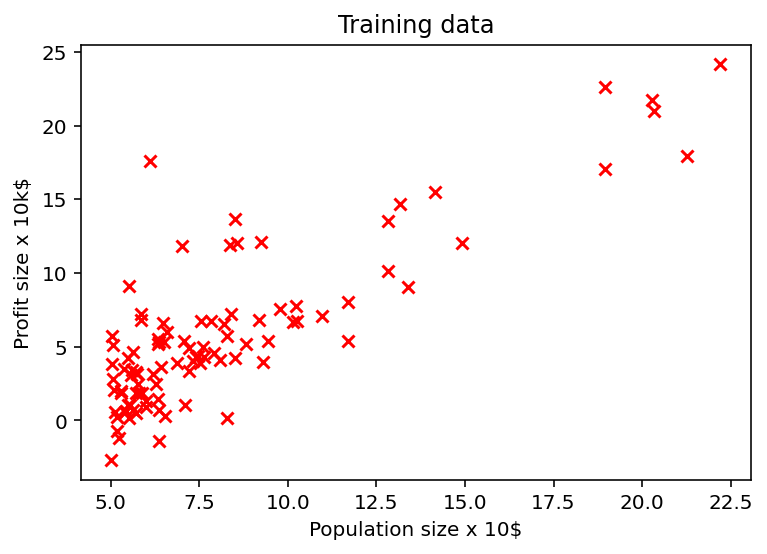

In [7]:
x_train = data[:,0]
y_train = data[:,1]
plt.title('Training data')
plt.xlabel('Population size x 10$')
plt.ylabel('Profit size x 10k$')
plt.scatter(x_train, y_train, c = 'r', marker = 'x')

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [8]:
# construct data matrix
X = np.append(np.ones(x_train.size).reshape(-1, 1), np.array(x_train).reshape(-1, 1) , axis = 1)

# parameters vector
w = np.array([[0], [0]])

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X, w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)


## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [9]:
# loss function definition
def loss_mse(y_pred,y): 

    temp_y = y_pred - y
    loss = np.dot(temp_y.T, temp_y) / y_pred.size
    
    return loss


# Test loss function 
y = np.array(y_train).reshape(-1, 1)# label 
y_pred = f_pred(X, w)# prediction

loss = loss_mse(y_pred,y)
print(loss)

[[64.14546775]]


## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [10]:
# gradient function definition
def grad_loss(y_pred,y,X):

    temp_y = y_pred - y
    grad = (2 * (np.dot(X.T, temp_y))) / (y_pred.size)
    return grad


# Test grad function 
y_pred = f_pred(X, w)
grad = grad_loss(y_pred,y,X)

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.0014061927795410156
11.462600167377458
[[-0.19732262]
 [ 0.82136091]]


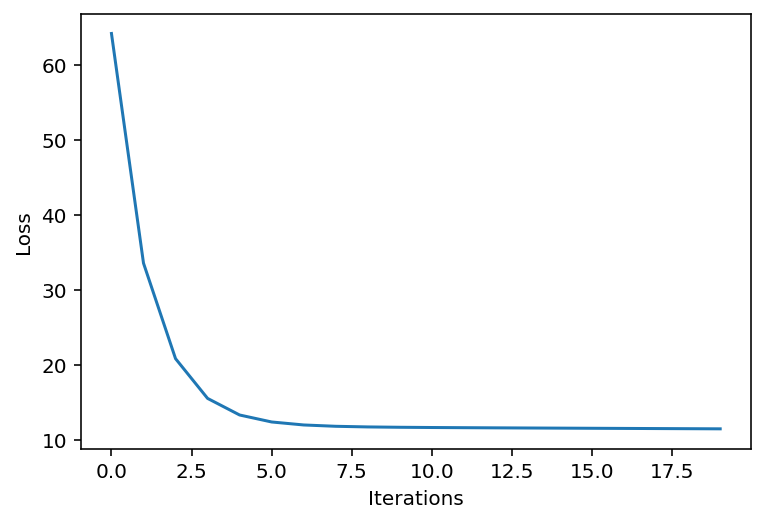

In [11]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.empty((max_iter, 1))# record the loss values
    w_iters = np.empty((max_iter, 2))# record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w)# linear predicition function
        grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
        w = w - tau * grad_f# update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
        w_iters[i,:] = w.T# save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.array([[0],[0]])
tau = 0.01
max_iter = 20

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[max_iter-1][0]) # plot the last value of the loss
print(w) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

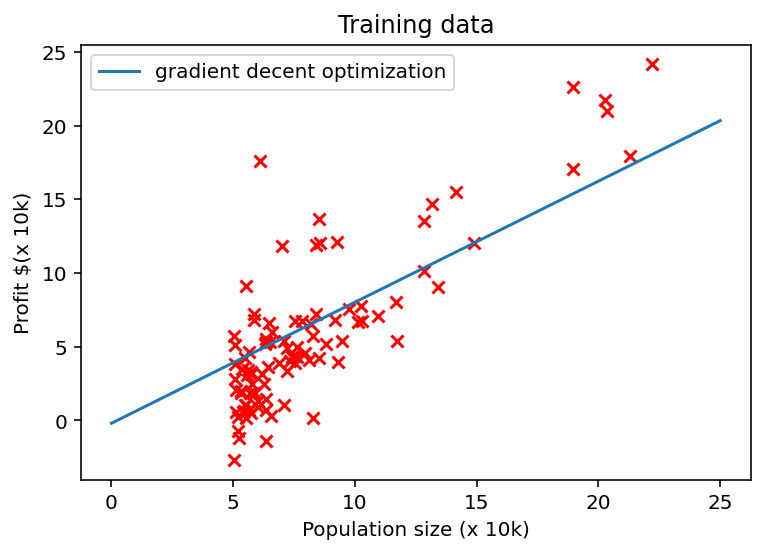

In [14]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
x_pred = np.append(np.ones(x_pred.size).reshape(-1, 1), np.array(x_pred).reshape(-1, 1) , axis = 1)
y_pred = f_pred(x_pred, w)# compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train, y_train, c = 'r', marker = 'x')
line1, = plt.plot(x_pred[:, 1], y_pred)
plt.legend(handles = (line1,), prop={'size': 10}, labels = ['gradient decent optimization'], loc='upper left')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.023693561553955078
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= [[8.95394275]]
loss gradient descent= 11.462600167377458


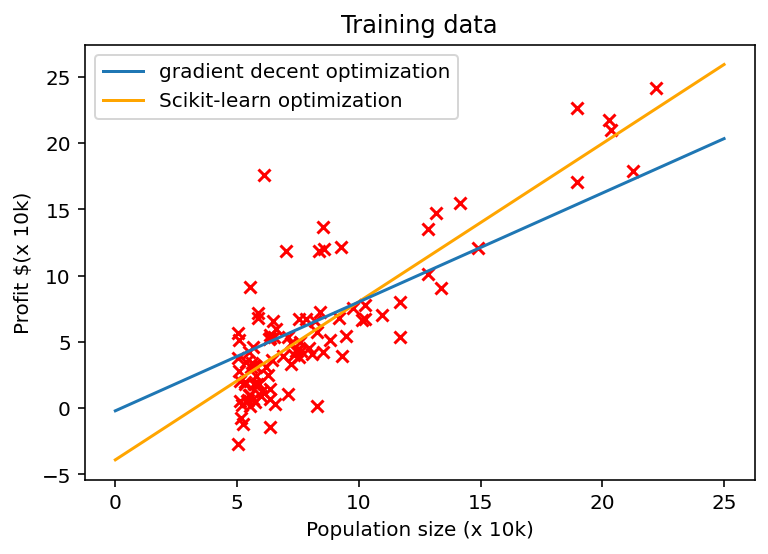

In [15]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)

y_pred_sklearn = lin_reg_sklearn.predict(np.array(x_train).reshape(-1, 1))
loss_sklearn = loss_mse(y_pred_sklearn, y) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1][0]) 


# plot
x_pred_sklearn = np.linspace(0,25,100)
y_pred_sklearn = lin_reg_sklearn.predict(np.array(x_pred_sklearn).reshape(-1, 1))# prediction obtained by the sklearn library

plt.figure(3)

line2, = plt.plot(x_pred_sklearn, y_pred_sklearn, c = 'orange')
line1, = plt.plot(x_pred[:, 1], y_pred)
plt.scatter(x_train, y_train, c = 'r', marker = 'x')
plt.legend(handles = (line1, line2), prop={'size': 10}, labels = ['gradient decent optimization', 'Scikit-learn optimization'], loc='upper left')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

In [53]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = np.dot(X, w)
        
        return f 
    
    def loss_mse(y_pred,y):
        
        temp_y = y_pred - y
        loss = np.dot(temp_y.T, temp_y) / y_pred.size
        
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = np.empty((max_iter, 1))# record the loss values
        w_iters = np.empty((max_iter, 2))# record the parameter values
        w = w_init # initialization
        
        for i in range(max_iter): # loop over the iterations
            
            y_pred = f_pred(X, w)# linear predicition function
            grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
            w = w - tau * grad_f# update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
            w_iters[i,:] = w.T# save the current w value 
            
        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
    w_B = np.empty([2,1], dtype=float)
    for (i,j),v in np.ndenumerate(Z):
        w_B[0][0] = B0[j] 
        w_B[1][0] = B1[i]
        y_B = f_pred(X, w_B)
        Z[i,j] = loss_mse(y_B, y)


    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter(w[0], w[1], L_iters[max_iter - 1][0],  c = 'r') # ????
    ax1.plot(w_iters[:, 0], w_iters[:, 1])

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    w0 = np.empty(max_iter)
    w1 = np.empty(max_iter)
    for i in range(max_iter):
        w0[i] = w_iters[i][0]
        w1[i] = w_iters[i][1]
        Z2[i] = L_iters[i][0]
   
    ax2.plot(w0, w1, Z2)
    ax2.scatter(w[0], w[1], L_iters[max_iter - 1][0],  c = 'r') # ???

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)


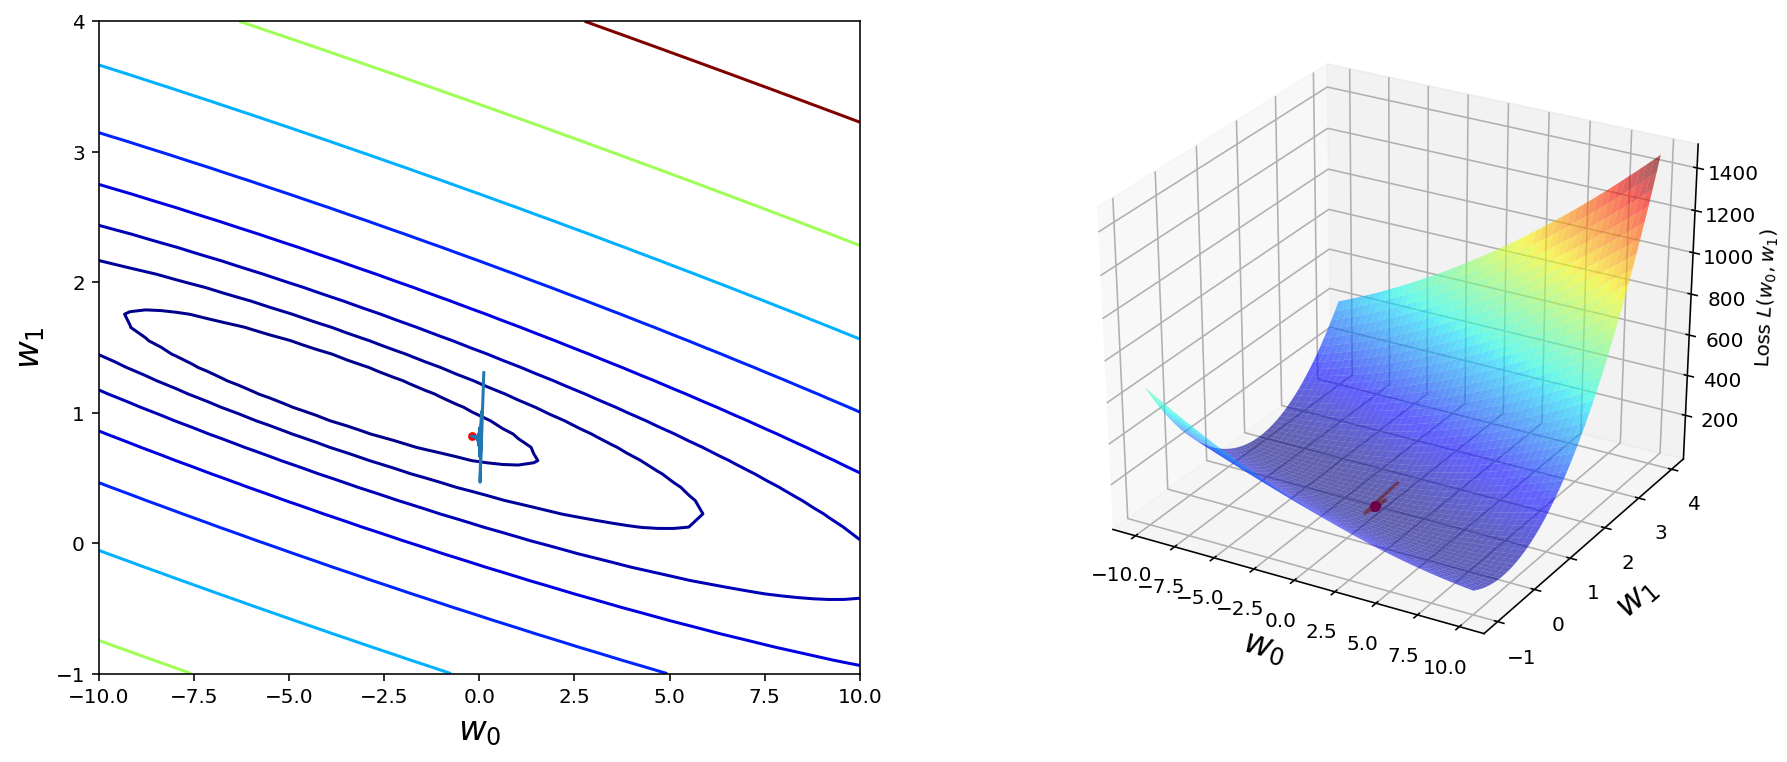

In [63]:
# run plot_gradient_descent function
w_init = np.array([[0], [0]])
tau = 0.01
max_iter = 20
X = np.append(np.ones(x_train.size).reshape(-1, 1), np.array(x_train).reshape(-1, 1) , axis = 1)
y = np.array(y_train).reshape(-1, 1)

plot_gradient_descent(X,y,w_init,tau,max_iter) 

# Output results

## 1. Plot the training data (1pt)

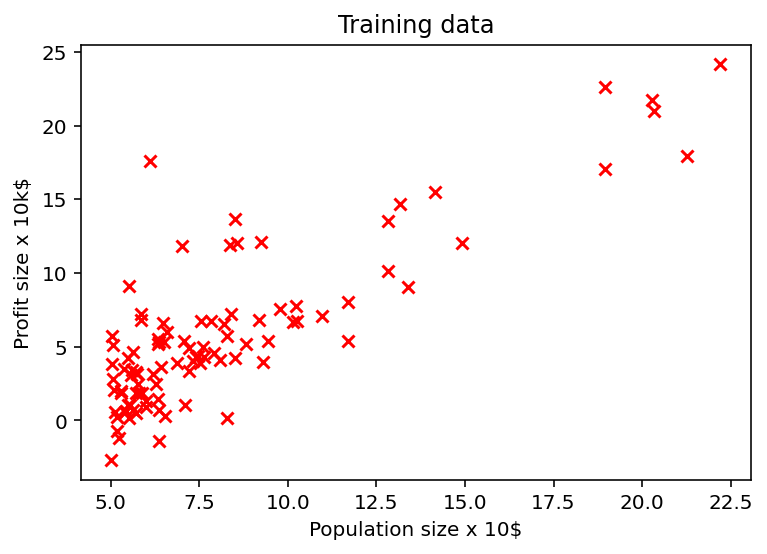

In [ ]:
x_train = data[:,0]
y_train = data[:,1]
plt.title('Training data')
plt.xlabel('Population size x 10$')
plt.ylabel('Profit size x 10k$')
plt.scatter(x_train, y_train, c = 'r', marker = 'x')

## 2. Plot the loss curve in the course of gradient descent (2pt)

Time= 0.0012981891632080078
11.462600167377458
[[-0.19732262]
 [ 0.82136091]]


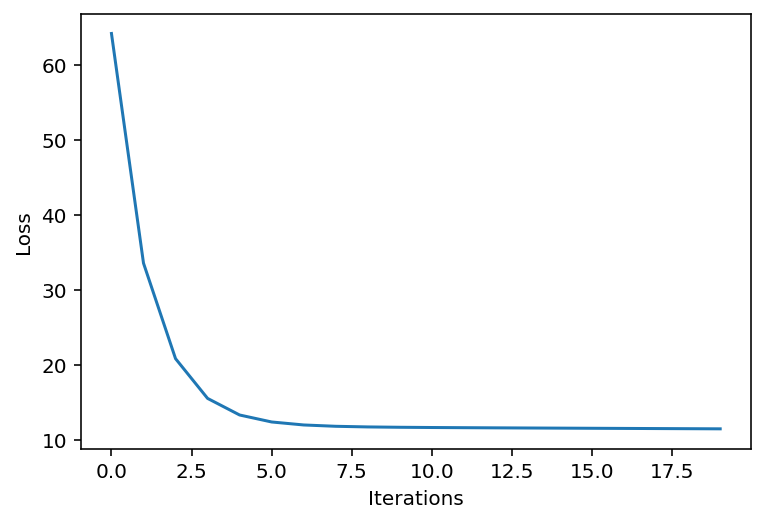

In [ ]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.empty((max_iter, 1))# record the loss values
    w_iters = np.empty((max_iter, 2))# record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w)# linear predicition function
        grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
        w = w - tau * grad_f# update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
        w_iters[i,:] = w.T# save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.array([[0],[0]])
tau = 0.01
max_iter = 20

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[max_iter-1][0]) # plot the last value of the loss
print(w) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 3. Plot the prediction function superimposed on the training data (2pt)

(100, 2)
(100, 1)


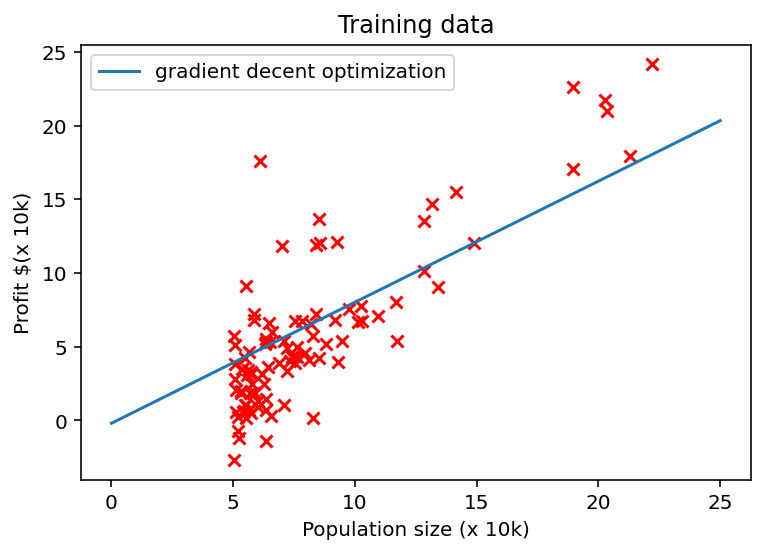

In [ ]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
x_pred = np.append(np.ones(x_pred.size).reshape(-1, 1), np.array(x_pred).reshape(-1, 1) , axis = 1)
y_pred = f_pred(x_pred, w)# compute the prediction values within the given domain x_pred

print(x_pred.shape)
print(y_pred.shape)
# plot
plt.figure(3)
plt.scatter(x_train, y_train, c = 'r', marker = 'x')
line = plt.plot(x_pred[:, 1], y_pred)
plt.legend(handles = (line), prop={'size': 10}, labels = ['gradient decent optimization'], loc='upper left')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

Time= 0.001325368881225586
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= [[8.95394275]]
loss gradient descent= 11.462600167377458


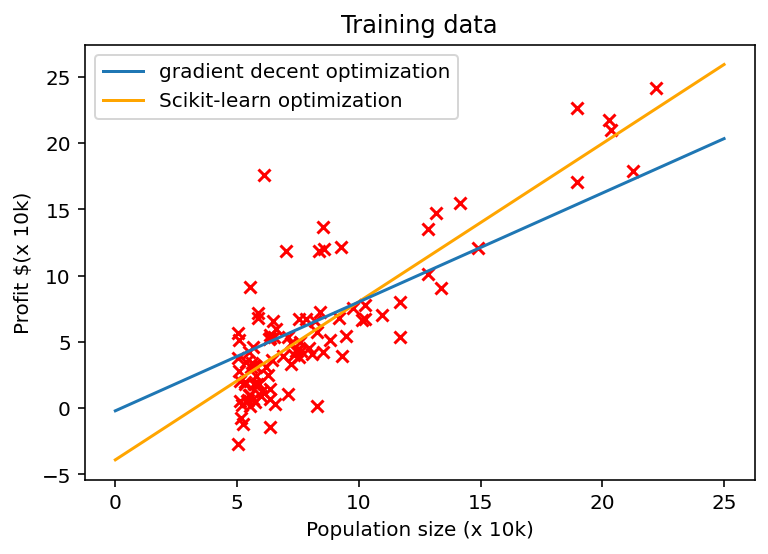

In [ ]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)

y_pred_sklearn = lin_reg_sklearn.predict(np.array(x_train).reshape(-1, 1))
loss_sklearn = loss_mse(y_pred_sklearn, y) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1][0]) 


# plot
x_pred_sklearn = np.linspace(0,25,100)
y_pred_sklearn = lin_reg_sklearn.predict(np.array(x_pred_sklearn).reshape(-1, 1))# prediction obtained by the sklearn library

plt.figure(3)

line2, = plt.plot(x_pred_sklearn, y_pred_sklearn, c = 'orange')
line1, = plt.plot(x_pred[:, 1], y_pred)
plt.scatter(x_train, y_train, c = 'r', marker = 'x')
plt.legend(handles = (line1, line2), prop={'size': 10}, labels = ['gradient decent optimization', 'Scikit-learn optimization'], loc='upper left')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

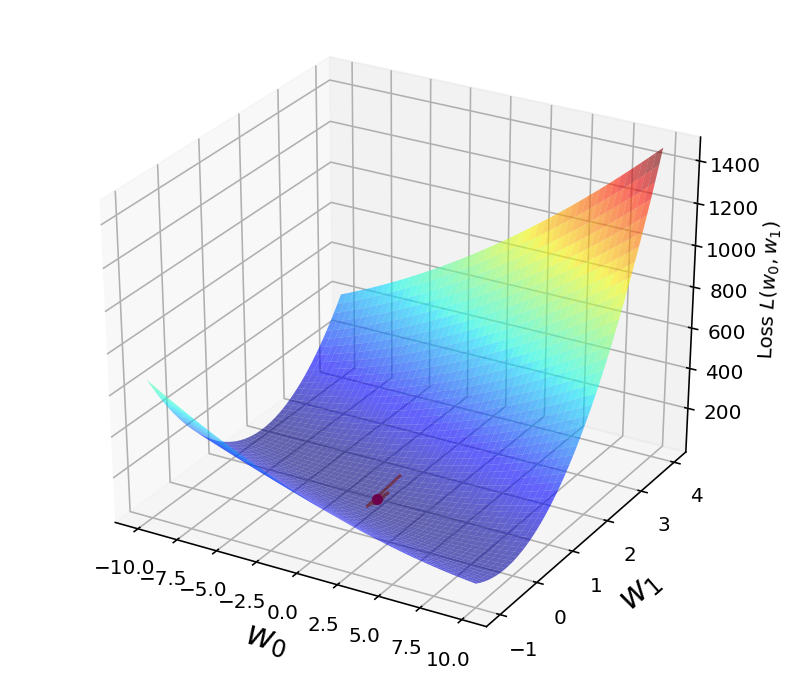

In [66]:
# plot gradient descent 
def plot_3d_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = np.dot(X, w)
        
        return f 
    
    def loss_mse(y_pred,y):
        
        temp_y = y_pred - y
        loss = np.dot(temp_y.T, temp_y) / y_pred.size
        
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = np.empty((max_iter, 1))# record the loss values
        w_iters = np.empty((max_iter, 2))# record the parameter values
        w = w_init # initialization
        
        for i in range(max_iter): # loop over the iterations
            
            y_pred = f_pred(X, w)# linear predicition function
            grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
            w = w - tau * grad_f# update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
            w_iters[i,:] = w.T# save the current w value 
            
        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
    w_B = np.empty([2,1], dtype=float)
    for (i,j),v in np.ndenumerate(Z):
        w_B[0][0] = B0[j] 
        w_B[1][0] = B1[i]
        y_B = f_pred(X, w_B)
        Z[i,j] = loss_mse(y_B, y)


    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax2 = fig.add_subplot(122, projection='3d')

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    w0 = np.empty(max_iter)
    w1 = np.empty(max_iter)
    for i in range(max_iter):
        w0[i] = w_iters[i][0]
        w1[i] = w_iters[i][1]
        Z2[i] = L_iters[i][0]
   
    ax2.plot(w0, w1, Z2)
    ax2.scatter(w[0], w[1], L_iters[max_iter - 1][0],  c = 'r') # ???

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)


# run plot_gradient_descent function
w_init = np.array([[0], [0]])
tau = 0.01
max_iter = 20
X = np.append(np.ones(x_train.size).reshape(-1, 1), np.array(x_train).reshape(-1, 1) , axis = 1)
y = np.array(y_train).reshape(-1, 1)

plot_3d_gradient_descent(X,y,w_init,tau,max_iter) 

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

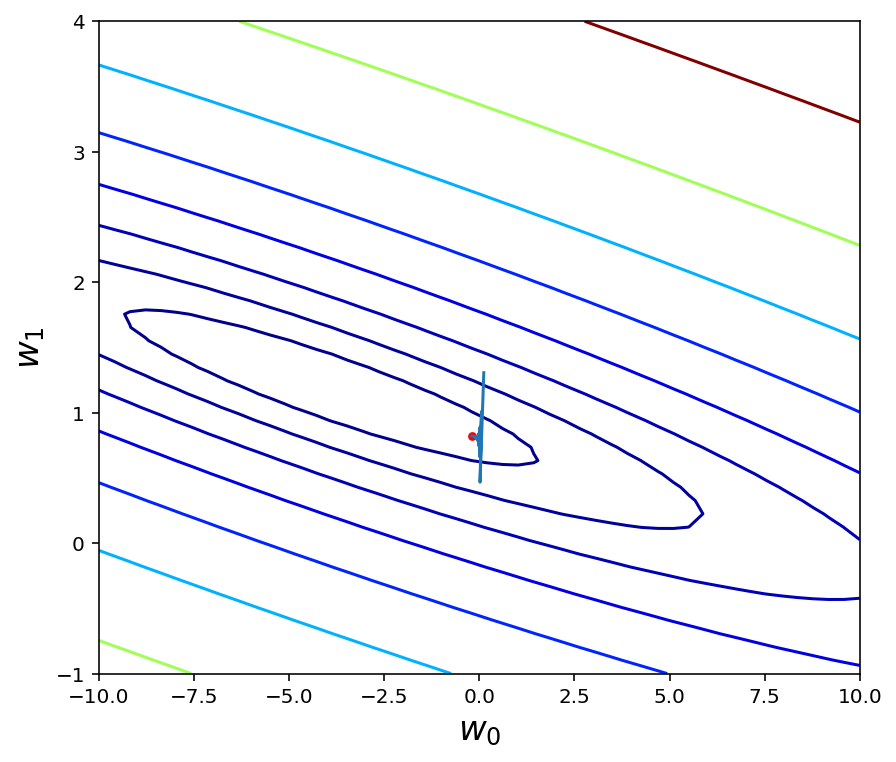

In [68]:
# plot gradient descent 
def plot_contuor_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = np.dot(X, w)
        
        return f 
    
    def loss_mse(y_pred,y):
        
        temp_y = y_pred - y
        loss = np.dot(temp_y.T, temp_y) / y_pred.size
        
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = np.empty((max_iter, 1))# record the loss values
        w_iters = np.empty((max_iter, 2))# record the parameter values
        w = w_init # initialization
        
        for i in range(max_iter): # loop over the iterations
            
            y_pred = f_pred(X, w)# linear predicition function
            grad_f = grad_loss(y_pred,y,X)# gradient of the loss 
            w = w - tau * grad_f# update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred,y)# save the current loss value 
            w_iters[i,:] = w.T# save the current w value 
            
        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
    w_B = np.empty([2,1], dtype=float)
    for (i,j),v in np.ndenumerate(Z):
        w_B[0][0] = B0[j] 
        w_B[1][0] = B1[i]
        y_B = f_pred(X, w_B)
        Z[i,j] = loss_mse(y_B, y)


    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter(w[0], w[1], L_iters[max_iter - 1][0],  c = 'r') # ????
    ax1.plot(w_iters[:, 0], w_iters[:, 1])

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)

# run plot_gradient_descent function
w_init = np.array([[0], [0]])
tau = 0.01
max_iter = 20
X = np.append(np.ones(x_train.size).reshape(-1, 1), np.array(x_train).reshape(-1, 1) , axis = 1)
y = np.array(y_train).reshape(-1, 1)

plot_contuor_gradient_descent(X,y,w_init,tau,max_iter) 